In [16]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import sys
sys.path.insert(0, "/content/drive/MyDrive/645")

In [18]:
from brooks import *

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Step 1: Collect Data
breakdown_data = pd.read_excel("/content/drive/MyDrive/645/MACHINE.xlsx", sheet_name="Machine breakdown")
repair_time_data = pd.read_excel("/content/drive/MyDrive/645/MACHINE.xlsx", sheet_name="Repair time")

In [21]:
# Step 3: For Discrete Distribution (Number of Breakdowns per Week)
breakdown_pmf = breakdown_data.set_index('Machine Breakdowns per Week')['Probability']
breakdown_pmf

Machine Breakdowns per Week
0    0.10
1    0.10
2    0.20
3    0.25
4    0.30
5    0.05
Name: Probability, dtype: float64

In [22]:
reptime_pmf = repair_time_data.set_index('Repair Time (hours)')['Probability']
reptime_pmf

Repair Time (hours)
1    0.3
2    0.5
3    0.2
Name: Probability, dtype: float64

In [23]:
n_weeks = 1000
average_breakdowns_per_week = []
credible_interval_breakdowns = []
average_repair_time_per_week = []
credible_interval_repair_time = []

In [24]:
rg = np.random.default_rng(12345)

In [25]:
for _ in range(n_weeks):
    # Simulate the number of breakdowns per week based on the PMF
    num_breakdowns = rg.choice(breakdown_pmf.index, p=breakdown_pmf)

    # Simulate repair times
    repair_times = [rg.choice(reptime_pmf.index, p=reptime_pmf) for _ in range(num_breakdowns)]

    # Calculate statistics for breakdowns
    average_breakdowns_per_week.append(num_breakdowns)
    credible_interval_breakdowns.append(num_breakdowns)

    # Calculate statistics for repair times
    average_repair_time_per_week.append(sum(repair_times))
    credible_interval_repair_time.append(sum(repair_times))

In [26]:
# Step 4: Calculate Statistics
average_breakdowns = np.mean(average_breakdowns_per_week)
credible_interval_breakdowns = np.percentile(credible_interval_breakdowns, [2.5, 97.5])

average_repair_time = np.mean(average_repair_time_per_week)
credible_interval_repair_time = np.percentile(credible_interval_repair_time, [2.5, 97.5])


In [27]:
# Step 5: Print Results
print("Average Number of Breakdowns per Week:", average_breakdowns)
print("95% Credible Interval for Breakdowns per Week:", credible_interval_breakdowns)
print("Average Weekly Repair Time (hours):", average_repair_time)
print("95% Credible Interval for Repair Time per Week (hours):", credible_interval_repair_time)

Average Number of Breakdowns per Week: 2.724
95% Credible Interval for Breakdowns per Week: [0. 5.]
Average Weekly Repair Time (hours): 5.154
95% Credible Interval for Repair Time per Week (hours): [ 0. 10.]


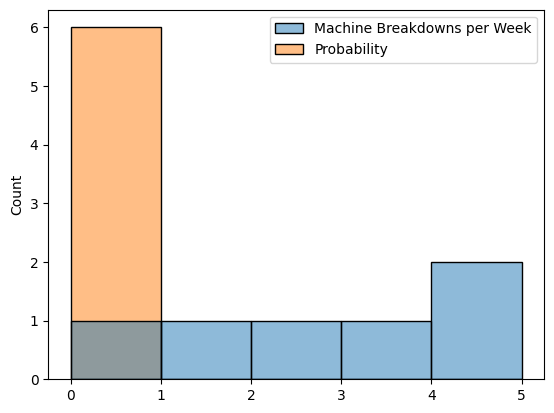

In [40]:
# Step 4: For Continuous Distribution (Repair Time)
# Plot a histogram
sns.histplot(breakdown_data)
plt.savefig("breakdown_data.png")

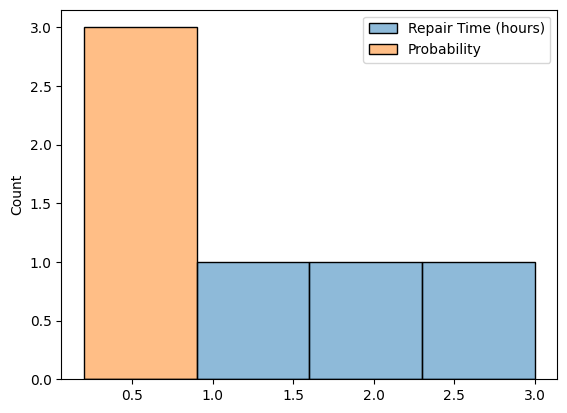

In [41]:
# Step 4: For Continuous Distribution (Repair Time)
# Plot a histogram
sns.histplot(repair_time_data)
plt.savefig("repair_time_data.png")